In [2]:
#---------------
#files imported
#--------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#-------------
#reading data
#------------

arr = pd.read_csv("arrhythmia_cmplt.csv",na_values={
    'J':['?'],
    'T':['?'],
    'P':['?'],
    'QRST':['?'],
    'Heart rate':['?']},index_col=False)

In [6]:
arr.head()

,Unnamed: 0,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
0,0,75,0,190,80,91,193,371,174,121,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,1,56,1,165,64,81,174,401,149,39,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,2,54,0,172,95,138,163,386,185,102,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,3,55,0,175,94,100,202,380,179,143,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,4,75,0,190,80,88,181,360,177,103,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [4]:
arr = arr.drop(columns='Unnamed: 0')

In [5]:
arr.shape[1]

280

In [ ]:
arr.columns.tolist()

In [6]:
arr['Class Distribution'].value_counts()

1     245
10     50
2      44
6      25
16     22
4      15
3      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: Class Distribution, dtype: int64

In [7]:
#------------------------
#changing from multiclass
#-------------------------

arr.replace(to_replace={'Class Distribution':{10:2,6:2,16:2,4:2,3:2,5:2,9:2,15:2,14:2,7:2,8:2}},inplace = True)

In [8]:
arr['Class Distribution'].value_counts()

1    245
2    207
Name: Class Distribution, dtype: int64

In [9]:
arr['Heart rate'].value_counts()

63.0     21
72.0     21
70.0     20
73.0     19
81.0     18
         ..
44.0      1
97.0      1
115.0     1
138.0     1
120.0     1
Name: Heart rate, Length: 63, dtype: int64

In [10]:
arr['J'].isnull().sum()

376

In [11]:
#------------------------
#replacing missing values
#------------------------

arr.replace(0,np.NaN)

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
0,75.0,NaN,190,80,91,193.0,371,174,121.0,-16.0,...,NaN,9.0,-0.9,NaN,NaN,0.9,2.9,23.3,49.4,2
1,56.0,1.0,165,64,81,174.0,401,149,39.0,25.0,...,NaN,8.5,NaN,NaN,NaN,0.2,2.1,20.4,38.8,2
2,54.0,NaN,172,95,138,163.0,386,185,102.0,96.0,...,NaN,9.5,-2.4,NaN,NaN,0.3,3.4,12.3,49.0,2
3,55.0,NaN,175,94,100,202.0,380,179,143.0,28.0,...,NaN,12.2,-2.2,NaN,NaN,0.4,2.6,34.6,61.6,1
4,75.0,NaN,190,80,88,181.0,360,177,103.0,-16.0,...,NaN,13.1,-3.6,NaN,NaN,-0.1,3.9,25.4,62.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1.0,160,70,80,199.0,382,154,117.0,-37.0,...,NaN,4.3,-5.0,NaN,NaN,0.7,0.6,-4.4,-0.5,1
448,37.0,NaN,190,85,100,137.0,361,201,73.0,86.0,...,NaN,15.6,-1.6,NaN,NaN,0.4,2.4,38.0,62.4,2
449,36.0,NaN,166,68,108,176.0,365,194,116.0,-85.0,...,NaN,16.3,-28.6,NaN,NaN,1.5,1.0,-44.2,-33.2,2
450,32.0,1.0,155,55,93,106.0,386,218,63.0,54.0,...,-0.4,12.0,-0.7,NaN,NaN,0.5,2.4,25.0,46.6,1


In [12]:
arr['V6_Q.milivolt wave'].isnull().count()

452

In [13]:
#------------------------------------
#replacing missing values with mean()
#------------------------------------

arr.fillna(arr.mean(),inplace = True)

In [14]:
arr.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,2
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,2
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,2
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,2


In [15]:
arr.to_csv("Arrhythmiafs.csv",index=False,header= True)

In [16]:
arr.describe()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,1.457965
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,0.498782
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,2.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,2.000000


In [17]:
arr.corr()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt,Class Distribution
Age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,0.013081
Sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.223480
Height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.061122
Weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.032760
QRS duration,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170,0.129796,-0.082791,0.329112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V6_P.milivolt wave,-0.037877,0.014210,0.067670,-0.046278,-0.065596,0.143272,-0.034971,0.049175,0.248092,0.082009,...,-0.085446,-0.008013,-0.092069,-0.019946,NaN,1.000000,-0.043307,-0.069852,-0.064171,-0.025178
V6_T.milivolt wave,-0.271504,0.065684,-0.008471,-0.144721,-0.222170,0.061160,-0.038884,-0.184846,0.016054,0.063300,...,0.116959,0.093749,-0.072408,-0.017690,NaN,-0.043307,1.000000,-0.124004,0.687877,-0.286870
V6_QRSA.milivolt,0.018043,0.031688,-0.090370,0.062285,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,0.002630,0.671383,0.562825,-0.051131,NaN,-0.069852,-0.124004,1.000000,0.611219,-0.079469
V6_QRSTA.milivolt,-0.199728,0.046605,-0.092235,-0.050682,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.082538,0.560374,0.341484,-0.049667,NaN,-0.064171,0.687877,0.611219,1.000000,-0.256972


In [18]:
#------------------------
#Splitting the instances
#------------------------

x = arr.drop(columns=['Class Distribution'])
y = arr['Class Distribution']

In [19]:
x.head()

,Age,Sex,Height,Weight,QRS duration,P-R interval,Q-T interval,T interval,P interval,QRS,...,V6_JJ.milivolt wave,V6_Q.milivolt wave,V6_R.milivolt wave,V6_S.milivolt wave,V6_R_.milivolt wave,V6_S_.milivolt wave,V6_P.milivolt wave,V6_T.milivolt wave,V6_QRSA.milivolt,V6_QRSTA.milivolt
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8


In [20]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Class Distribution, dtype: int64

In [21]:
#-----------------------------
#Selecting appropriate features
#------------------------------

from sklearn.ensemble import ExtraTreesClassifier 

In [22]:
model = ExtraTreesClassifier()
model.fit(x,y)

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

V1.msec-R_ wave                            0.026742
V2.msec-R_ wave                            0.019996
V4_QRSTA.milivolt                          0.018598
V1.msec-Number of intrinsic deflections    0.018379
CDII_QRSTA.milivolt                        0.017984
T.milivolt wave                            0.017455
Sex                                        0.016672
Heart rate                                 0.014812
V5_T.milivolt wave                         0.014012
V5_JJ.milivolt wave                        0.013975
T                                          0.013387
V1.msec-S wave                             0.013349
QRS duration                               0.012089
CDII.msec-S wave                           0.011340
V5.msec-S wave                             0.011106
dtype: float64


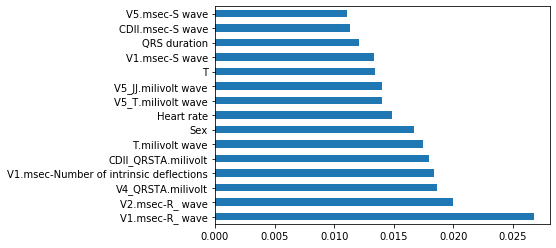

In [23]:
ft_imprtnce = pd.Series(model.feature_importances_,index = x.columns)
print(ft_imprtnce.nlargest(15))
ft_imprtnce.nlargest(15).plot(kind = 'barh')
plt.show()